# Cluster analysis in Python
## Machine Learning Unpervised

**Author:** Oscar Hernández Terán                                                            
**Date:** 16 February, 2023

- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified or characterized
- The objective of the algorithm is to interpret any structure in data

Examples of ML-NS algorithms use
1. Ranking of similar news in Google

**Labeled and unlabeled data:**

Labeled data:
1. Point(1,2): Danger Zone
2. Point(3,4): Danger Zone
3. Point(5,6): Normal Zone

Unlabeled data:
1. Point(1,2)
2. Point(3,4)
3. Point(5,6)

### What is clustering?
- The process of grouping items with similar characteristics
- Items in groups of similar to each other than in other groups

## Basic of cluster analysis

**Cluster:** Group of items with similar characteristics

In [17]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq

In [18]:
x = [9  ,6  ,2  ,3  ,1  ,7  ,1  ,6  ,1  ,7  ,23 ,26 ,25 ,23 ,21 ,23 ,23 ,20 ,30 ,23 ]
y = [8, 4,10, 6, 0, 4,10,10, 6,1,29,25,30,29,29,30,25,27,26,30]
data = pd.DataFrame({'X':x, 'Y':y})

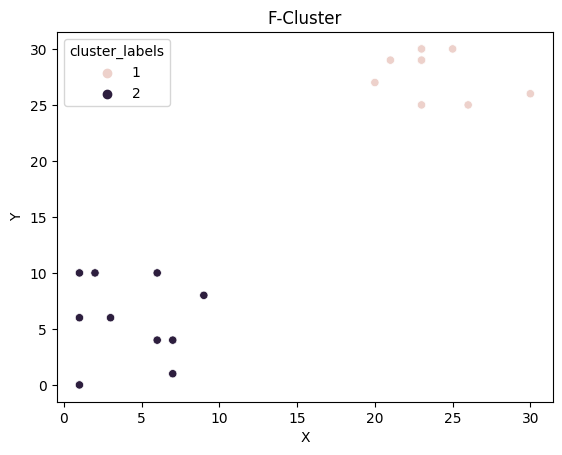

In [19]:
# The Linkage method calculates the distance between intermediate groups.
# Use the linkage() function to compute distances
Z = linkage(data, 'ward')

# Generate cluster labels
data['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the point with seaborn
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=data)
plt.title('F-Cluster')
plt.show()

In [20]:
x = [9  ,6  ,2  ,3  ,1  ,7  ,1  ,6  ,1  ,7  ,23 ,26 ,25 ,23 ,21 ,23 ,23 ,20 ,30 ,23 ]
y = [8, 4,10, 6, 0, 4,10,10, 6,1,29,25,30,29,29,30,25,27,26,30]
data = pd.DataFrame({'X':np.float_(x), 'Y':np.float_(y)})

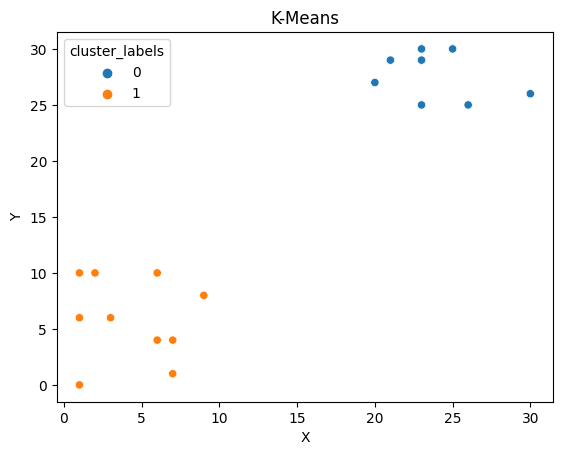

In [21]:
# Compute cluster center
centroids, _ = kmeans(data, 2)

# Assign cluster labels 
data['cluster_labels'], _ = vq(data, centroids)

# Plot the points with seaborn
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=data)
plt.title('K-Means')
plt.show()

### Data preparation for cluster analysis

**Normalization:**                                             
Process of rescaling data to a standard deviation of 1 
$$
X_{new} = \frac{X}{std\_dev(x)}
$$

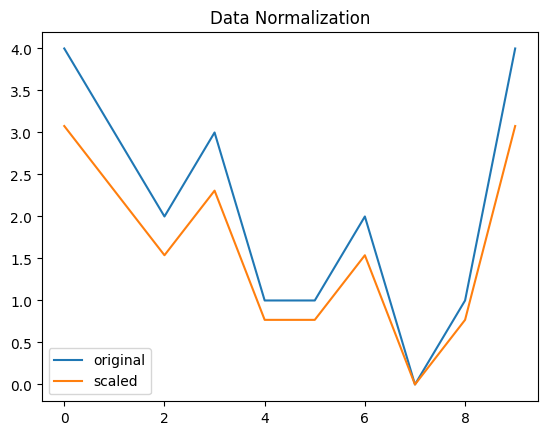

In [22]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

plt.title('Data Normalization')

# Display the plot
plt.show()

In [23]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()

plt.title('Data Normalization')
plt.show()

### Basic of hierarchical clustering


Distance matrix for each stage

```python
scipy.cluster.hierarchy.linkage(observations, 
                                method='single',
                                metric='euclidian',
                                optimal_ordering=False
)
```

- **'single'** : based on two closest objects
- **'complete'** : based on two farthest objects
- **'average'** : based on the arithmetic mean of all objects
- **'centroid'** : based on the geometric mean of all objects
- **'median'** : based on the median of all objects
- **'ward'** : based on the sum of squares

In [24]:
x_coordinate = [17,20,35,14,37,33,14,30,35,17,11,21,13,10,81,84,87,83,90,97,94,88,89,93,92,82,81,92,91,22,23,25,25,27,17,17]
y_coordinate = [4,  6,  0,  0,  4,  3,  1,  6,  5,  4,  6, 10,  8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98,100, 93, 98, 15, 10,  0, 10,  7, 17, 15]
x_scaled = [0.509 ,0.599 ,1.049 ,0.419 ,1.109 ,0.989 ,0.419 ,0.899 ,1.049 ,0.509 ,0.330 ,0.629 ,0.390 ,0.300 ,2.427 ,2.517 ,2.607 ,2.487 ,2.697 ,2.906 ,2.816 ,2.637 ,2.667 ,2.786 ,2.756 ,2.457 ,2.427 ,2.756 ,2.727 ,0.659 ,0.689 ,0.749 ,0.749 ,0.809 ,0.509 ,0.509]
y_scaled = [0.090, 0.135, 0.000, 0.000, 0.090, 0.068, 0.023, 0.135, 0.113, 0.090, 0.135, 0.225, 0.180, 0.225, 2.183, 2.115, 2.228, 2.138, 2.138, 2.183, 2.228, 2.228, 2.115, 2.228, 2.025, 2.205, 2.250, 2.093, 2.205, 0.338, 0.225, 0.000, 0.225, 0.158, 0.383, 0.338]

comic_con = pd.DataFrame({'X':x_coordinate, 'Y':y_coordinate, 'x_scaled':x_scaled, 'y_scaled':y_scaled})

In [25]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.title('Hierachical cluster')
plt.show()

In [26]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.plot('Method: Single')
plt.show()

In [27]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.plot('Method: Complete')
plt.show()

### How many clusters?

Introduction to dendograms: Is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

```python
from scipy.cluster.hierarchy import dendrogram

Z = linkage(df[['x_whiten', 'y_whiten']],
            method='ward',
            metric='euclidean')
dn = dendogram(Z)
plt.show()

```

In [28]:
from scipy.cluster.hierarchy import dendrogram

### Limit of hierarchical clustering

- The most time-consuming step is the construction of the distance matrix. 
- It has quadratic complexity

### Basic of K-Means Clustering
K-Means runs significantly faster on large datasets

```python
kmeans(obs, k_or_guess, iter, thresh, check_finit)
```

- **obs:** Standardized observation
- **k_or_guess:** number of cluster
- **iter:** Number of iterations (default: 20)
- **thres:** threshold (defalut: 1e-5)
- **check_finite:**Wheter to check if observations contain only finite numbers (default: True)

Returns:                                                                     
The cluster center and distortion 

Distortion: SUm of squares of distance of points from cliuster center

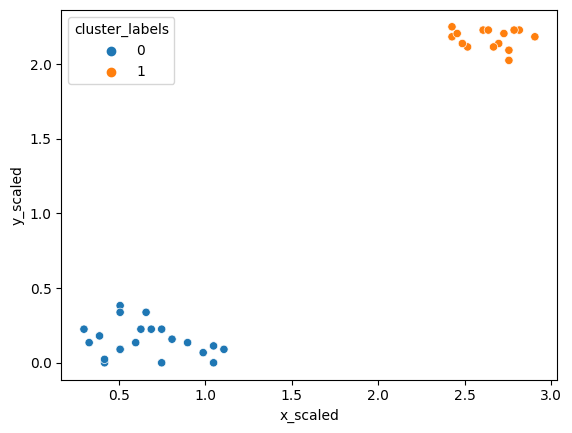

In [29]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### How many clusters?
Elbow method

In [32]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow plot for choose cluster')
plt.show()

### Limitations of k-means clustering
- How to find the rigth k (number of cluster)
- Impact of seeds
- Biased towards equal sized clusters

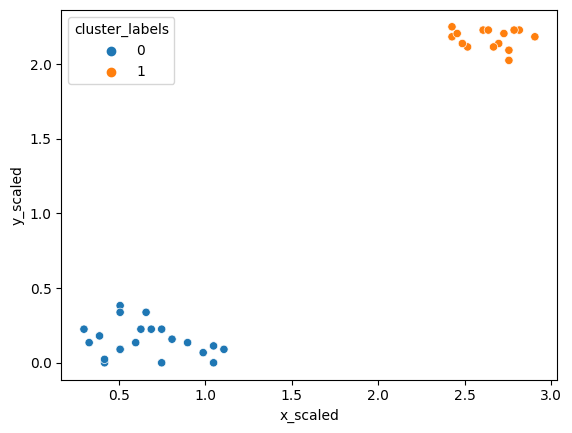

In [31]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Dominant colors in images

### Document clustring

**NLP concepts**:
- Clean data before processing
- Determine the importance of terms in a document(in TF-IDF matrix)
- Cluster the TF-IDF matrix
- Find top terms, documents in each cluster

### Clustering with multiple features

